In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv(r"C:\Users\acer pc\Desktop\UBER_TRIP_ANALYSIS_PYTHON\uber-raw-data-sep14.csv\uber-raw-data-sep14.csv")
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


# Converting datatype of Date/Time.

In [9]:
data['Date/Time']=pd.to_datetime(data['Date/Time'])

In [10]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

# Creating new columns from Date/Time column.

In [18]:
data['day']=data["Date/Time"].apply(lambda x:x.day)
data['weekday']=data['Date/Time'].apply(lambda x:x.weekday())
data['hour']=data['Date/Time'].apply(lambda x:x.hour)
data.head()

,Date/Time,Lat,Lon,Base,day,weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


# Checking for Null values.

In [19]:
data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
day          0
weekday      0
hour         0
dtype: int64

# I am using the Uber trips for the September month,
so let’s look at each day to see on which day the Uber trips were highest.

C:\Users\acer pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


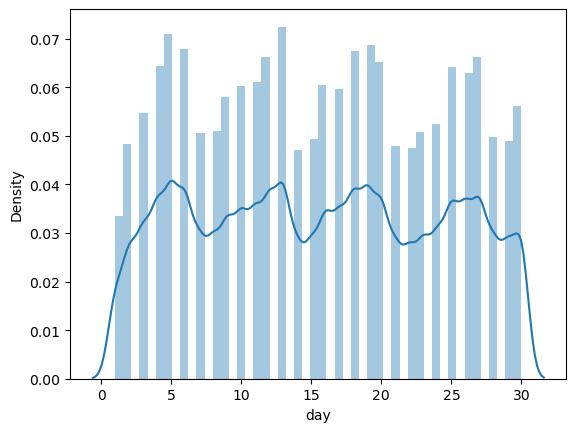

In [37]:
sns.distplot(data['day'])
plt.show()

# By looking at the daily trips we can say that the Uber trips are raising on the working days and decreases on the weekends.

# Now let’s see the Uber trips according to the hours:

C:\Users\acer pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


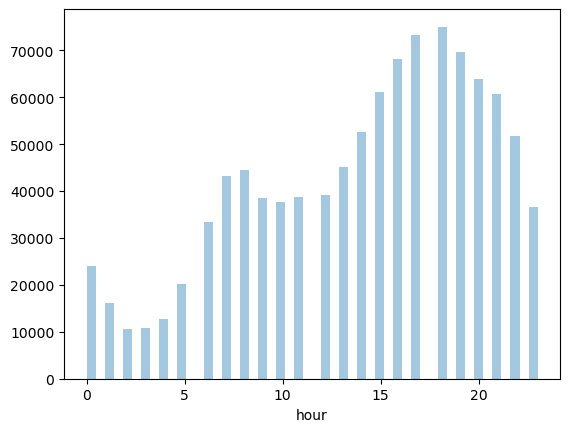

In [39]:
sns.distplot(data['hour'],kde=False)
plt.show()

# According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing.

# Now let’s analyze the Uber trips according to the weekdays:


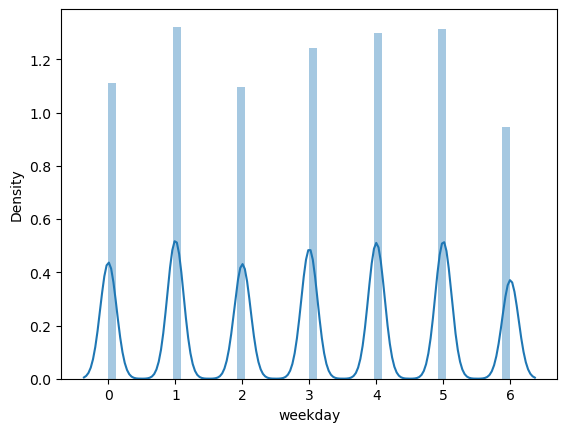

In [42]:
sns.distplot(data['weekday'])
plt.show()

# In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. 


# On Saturdays, the Uber trips are the lowest and on Mondays they are the highest.

# Now let’s have a look at the correlation of hours and weekdays on the Uber trips:

In [58]:
df=data.groupby(["weekday","hour"]).apply(lambda x:len(x))
df=df.unstack()
df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


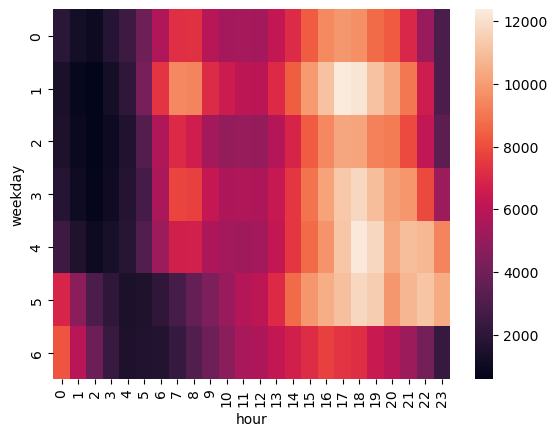

In [67]:
sns.heatmap(df,annot=False)
plt.show()
#Correlation of wekday and hour.

# As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

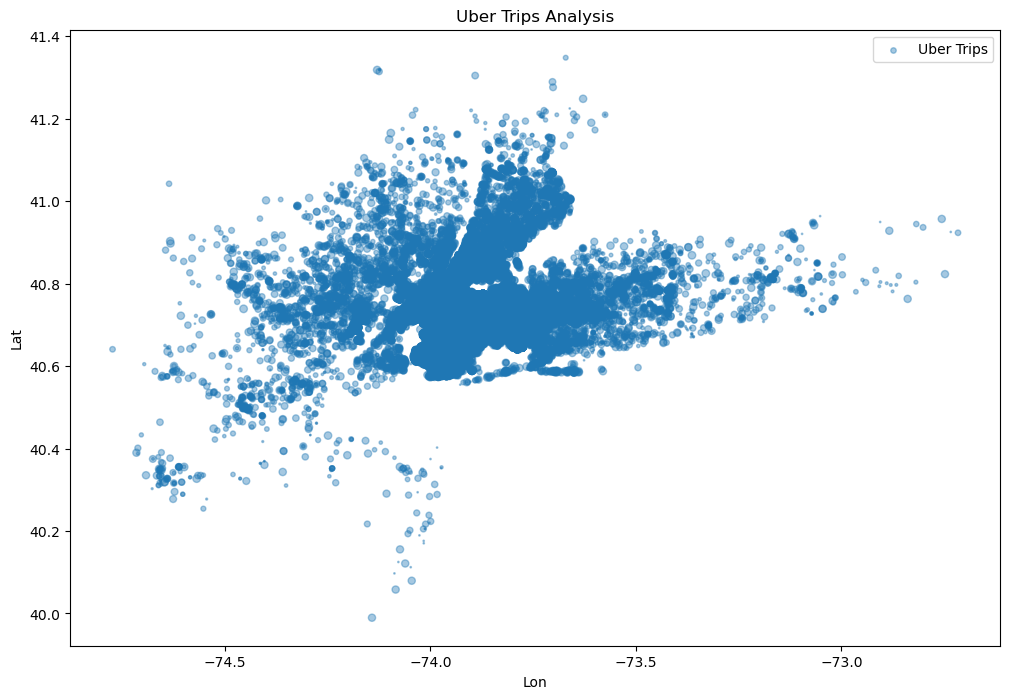

In [69]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

# SUMMARY::

# So this is how we can analyze the Uber trips for New York City. 
Some of the conclusions that I got from this analysis are:


Monday is the most profitable day for Uber,
On Saturdays less number of people use Uber,
6 pm is the busiest day for Uber,
On average a rise in Uber trips start around 5 am,
